<a href="https://colab.research.google.com/github/Ravindra1972/Anaytics-in-finance-using-Python/blob/main/Downside_Risk_Measurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tabulate import tabulate
import yfinance as yf
%matplotlib inline

ticker= "tsla"
stock_data = yf.download(ticker, start="2016-01-04", end="2024-07-19")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
stock_data.head()



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-12,235.800003,251.839996,233.089996,248.229996,248.229996,155694400
2024-07-15,255.970001,265.600006,251.729996,252.639999,252.639999,146912900
2024-07-16,255.309998,258.619995,245.800003,256.559998,256.559998,126332500
2024-07-17,252.729996,258.470001,246.179993,248.500000,248.500000,115584800
2024-07-18,251.089996,257.140015,247.199997,249.229996,249.229996,110869000


In [ ]:
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-12,235.800003,251.839996,233.089996,248.229996,248.229996,155694400
2024-07-15,255.970001,265.600006,251.729996,252.639999,252.639999,146912900
2024-07-16,255.309998,258.619995,245.800003,256.559998,256.559998,126332500
2024-07-17,252.729996,258.470001,246.179993,248.500000,248.500000,115584800
2024-07-18,251.089996,257.140015,247.199997,249.229996,249.229996,110869000


<Axes: xlabel='Date'>

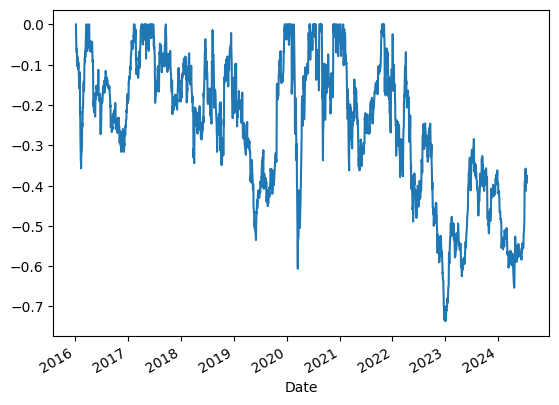

In [ ]:
daily_close_pct_change = stock_data['Adj Close'].pct_change()
wealth_index = 1000 * (1 + daily_close_pct_change).cumprod()
previous_peaks = wealth_index.cummax()
drawdown = (wealth_index - previous_peaks) / previous_peaks
drawdown.plot()

In [ ]:
daily_close_pct_change.sort_values(inplace=True, ascending=True)

VaR_90 = daily_close_pct_change.quantile(0.1)
VaR_95 = daily_close_pct_change.quantile(0.05)
VaR_99 = daily_close_pct_change.quantile(0.01)

print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0365489
95%                      -0.052736
99%                      -0.0926226


In [ ]:
CVaR_90 = daily_close_pct_change[daily_close_pct_change <= VaR_90].mean()
CVaR_95 = daily_close_pct_change[daily_close_pct_change <= VaR_95].mean()
CVaR_99 = daily_close_pct_change[daily_close_pct_change <= VaR_99].mean()


print(tabulate([['90%', CVaR_90], ['95%', CVaR_95], ['99%', CVaR_99]], headers=['Confidence Level', 'Conditional Value at Risk (Expected Loss)']))

Confidence Level      Conditional Value at Risk (Expected Loss)
------------------  -------------------------------------------
90%                                                  -0.0628177
95%                                                  -0.0812648
99%                                                  -0.128511
